In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('/content/drive/MyDrive/MACHINE LEARNING/mental_disorders_reddit.csv')

In [5]:
df.head(5)

,title,selftext,created_utc,over_18,subreddit
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD


In [6]:
# View unique values for each column
print("Unique values in 'title':", df['title'].nunique())
print("Unique values in 'selftext':", df['selftext'].nunique())
print("Unique values in 'created_utc':", df['created_utc'].nunique())
print("Unique values in 'over_18':", df['over_18'].unique())
print("Unique values in 'subreddit':", df['subreddit'].unique())


Unique values in 'title': 621001
Unique values in 'selftext': 563917
Unique values in 'created_utc': 698266
Unique values in 'over_18': [False  True]
Unique values in 'subreddit': ['BPD' 'bipolar' 'depression' 'Anxiety' 'schizophrenia' 'mentalillness']


In [7]:
df.isnull().sum()

,0
title,46
selftext,33691
created_utc,0
over_18,0
subreddit,0


In [8]:
df_clean = df.dropna(subset=['title', 'selftext'])

# Optionally, reset index
df_clean.reset_index(drop=True, inplace=True)

In [9]:
df_clean.isnull().sum()

,0
title,0
selftext,0
created_utc,0
over_18,0
subreddit,0


In [10]:
# To show all unique values in a specific column, e.g., 'selftext'
unique_values = df_clean['over_18'].unique()

# Print total number of unique values
print(f"Total unique values in 'over_18': {len(unique_values)}")

# Display all unique values
for i, val in enumerate(unique_values):
    print(f"{i+1}. {val}")


Total unique values in 'over_18': 2
1. False
2. True


In [11]:
df_clean.head(12)

,title,selftext,created_utc,over_18,subreddit
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD
4,help,[removed],1650350907,False,BPD
5,My ex got diagnosed with BPD,"Without going into detail, this diagnosis expl...",1650350635,False,BPD
6,Is misdiagnosis of BPD common? I am asking bec...,(Reposting here on the larger sub on recommend...,1650349446,False,BPD
7,I have trouble identifying my sexual orientati...,I grew up mostly dating men but realized when ...,1650349125,False,BPD
8,Needing advice…,I posted on this sub earlier today about havin...,1650349094,False,BPD
9,Do I have BPD?,[removed],1650349072,True,BPD


In [12]:
df_clean['text'] = df_clean['title'] + " " + df_clean['selftext']


/tmp/ipython-input-12-1508004983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text'] = df_clean['title'] + " " + df_clean['selftext']


In [13]:
df_clean

,title,selftext,created_utc,over_18,subreddit,text
0,Life is so pointless without others,Does anyone else think the most important part...,1650356960,False,BPD,Life is so pointless without others Does anyon...
1,Cold rage?,Hello fellow friends 😄\n\nI'm on the BPD spect...,1650356660,False,BPD,Cold rage? Hello fellow friends 😄\n\nI'm on th...
2,I don’t know who I am,My [F20] bf [M20] told me today (after I said ...,1650355379,False,BPD,I don’t know who I am My [F20] bf [M20] told m...
3,HELP! Opinions! Advice!,"Okay, I’m about to open up about many things I...",1650353430,False,BPD,"HELP! Opinions! Advice! Okay, I’m about to ope..."
4,help,[removed],1650350907,False,BPD,help [removed]
...,...,...,...,...,...,...
668049,I really need to talk to a therapist..,I can't afford a real session and it's 11 PM. ...,1415332108,False,mentalillness,I really need to talk to a therapist.. I can't...
668050,I have pica,Hello. \n I'm taking steps to get rid ...,1414896638,False,mentalillness,I have pica Hello. \n I'm taking steps...
668051,Where can you go to get help for someone menta...,Someone (a war veteran) I know is mentally ill...,1396298261,False,mentalillness,Where can you go to get help for someone menta...
668052,I am rooster illusion,AMA,1344639905,False,mentalillness,I am rooster illusion AMA


In [14]:
df_clean.drop(columns=['title', 'selftext'], inplace=True)


/tmp/ipython-input-14-3350322391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=['title', 'selftext'], inplace=True)


In [15]:
df_clean

,created_utc,over_18,subreddit,text
0,1650356960,False,BPD,Life is so pointless without others Does anyon...
1,1650356660,False,BPD,Cold rage? Hello fellow friends 😄\n\nI'm on th...
2,1650355379,False,BPD,I don’t know who I am My [F20] bf [M20] told m...
3,1650353430,False,BPD,"HELP! Opinions! Advice! Okay, I’m about to ope..."
4,1650350907,False,BPD,help [removed]
...,...,...,...,...
668049,1415332108,False,mentalillness,I really need to talk to a therapist.. I can't...
668050,1414896638,False,mentalillness,I have pica Hello. \n I'm taking steps...
668051,1396298261,False,mentalillness,Where can you go to get help for someone menta...
668052,1344639905,False,mentalillness,I am rooster illusion AMA


In [16]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df_clean['clean_text'] = df_clean['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/tmp/ipython-input-16-4283683868.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['clean_text'] = df_clean['text'].apply(clean_text)


In [17]:
df_clean

,created_utc,over_18,subreddit,text,clean_text
0,1650356960,False,BPD,Life is so pointless without others Does anyon...,life pointless without others anyone else thin...
1,1650356660,False,BPD,Cold rage? Hello fellow friends 😄\n\nI'm on th...,cold rage hello fellow friends im bpd spectrum...
2,1650355379,False,BPD,I don’t know who I am My [F20] bf [M20] told m...,dont know f bf told today said wish could bett...
3,1650353430,False,BPD,"HELP! Opinions! Advice! Okay, I’m about to ope...",help opinions advice okay im open many things ...
4,1650350907,False,BPD,help [removed],help removed
...,...,...,...,...,...
668049,1415332108,False,mentalillness,I really need to talk to a therapist.. I can't...,really need talk therapist cant afford real se...
668050,1414896638,False,mentalillness,I have pica Hello. \n I'm taking steps...,pica hello im taking steps get rid pica ive pi...
668051,1396298261,False,mentalillness,Where can you go to get help for someone menta...,go get help someone mentally ill psyche wards ...
668052,1344639905,False,mentalillness,I am rooster illusion AMA,rooster illusion ama


In [18]:
df_clean.isnull().sum()

,0
created_utc,0
over_18,0
subreddit,0
text,0
clean_text,0


In [19]:
df_clean['over_18'] = df_clean['over_18'].astype(int)  # True → 1, False → 0


/tmp/ipython-input-19-1028022998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['over_18'] = df_clean['over_18'].astype(int)  # True → 1, False → 0


In [20]:
df_clean

,created_utc,over_18,subreddit,text,clean_text
0,1650356960,0,BPD,Life is so pointless without others Does anyon...,life pointless without others anyone else thin...
1,1650356660,0,BPD,Cold rage? Hello fellow friends 😄\n\nI'm on th...,cold rage hello fellow friends im bpd spectrum...
2,1650355379,0,BPD,I don’t know who I am My [F20] bf [M20] told m...,dont know f bf told today said wish could bett...
3,1650353430,0,BPD,"HELP! Opinions! Advice! Okay, I’m about to ope...",help opinions advice okay im open many things ...
4,1650350907,0,BPD,help [removed],help removed
...,...,...,...,...,...
668049,1415332108,0,mentalillness,I really need to talk to a therapist.. I can't...,really need talk therapist cant afford real se...
668050,1414896638,0,mentalillness,I have pica Hello. \n I'm taking steps...,pica hello im taking steps get rid pica ive pi...
668051,1396298261,0,mentalillness,Where can you go to get help for someone menta...,go get help someone mentally ill psyche wards ...
668052,1344639905,0,mentalillness,I am rooster illusion AMA,rooster illusion ama


In [21]:

print("Unique values in 'subreddit':", df['subreddit'].unique())


Unique values in 'subreddit': ['BPD' 'bipolar' 'depression' 'Anxiety' 'schizophrenia' 'mentalillness']


In [22]:
df_clean.drop(columns=['text'], inplace=True)


/tmp/ipython-input-22-3617245848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=['text'], inplace=True)


In [23]:
df_clean

,created_utc,over_18,subreddit,clean_text
0,1650356960,0,BPD,life pointless without others anyone else thin...
1,1650356660,0,BPD,cold rage hello fellow friends im bpd spectrum...
2,1650355379,0,BPD,dont know f bf told today said wish could bett...
3,1650353430,0,BPD,help opinions advice okay im open many things ...
4,1650350907,0,BPD,help removed
...,...,...,...,...
668049,1415332108,0,mentalillness,really need talk therapist cant afford real se...
668050,1414896638,0,mentalillness,pica hello im taking steps get rid pica ive pi...
668051,1396298261,0,mentalillness,go get help someone mentally ill psyche wards ...
668052,1344639905,0,mentalillness,rooster illusion ama


In [24]:
import pandas as pd

# Convert Unix timestamp to datetime format
df_clean['created_datetime'] = pd.to_datetime(df_clean['created_utc'], unit='s')


/tmp/ipython-input-24-2435375867.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['created_datetime'] = pd.to_datetime(df_clean['created_utc'], unit='s')


In [25]:
df_clean

,created_utc,over_18,subreddit,clean_text,created_datetime
0,1650356960,0,BPD,life pointless without others anyone else thin...,2022-04-19 08:29:20
1,1650356660,0,BPD,cold rage hello fellow friends im bpd spectrum...,2022-04-19 08:24:20
2,1650355379,0,BPD,dont know f bf told today said wish could bett...,2022-04-19 08:02:59
3,1650353430,0,BPD,help opinions advice okay im open many things ...,2022-04-19 07:30:30
4,1650350907,0,BPD,help removed,2022-04-19 06:48:27
...,...,...,...,...,...
668049,1415332108,0,mentalillness,really need talk therapist cant afford real se...,2014-11-07 03:48:28
668050,1414896638,0,mentalillness,pica hello im taking steps get rid pica ive pi...,2014-11-02 02:50:38
668051,1396298261,0,mentalillness,go get help someone mentally ill psyche wards ...,2014-03-31 20:37:41
668052,1344639905,0,mentalillness,rooster illusion ama,2012-08-10 23:05:05


In [26]:
df_clean.drop(columns=['created_utc'], inplace=True)

/tmp/ipython-input-26-2004474851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=['created_utc'], inplace=True)


In [27]:
df_clean

,over_18,subreddit,clean_text,created_datetime
0,0,BPD,life pointless without others anyone else thin...,2022-04-19 08:29:20
1,0,BPD,cold rage hello fellow friends im bpd spectrum...,2022-04-19 08:24:20
2,0,BPD,dont know f bf told today said wish could bett...,2022-04-19 08:02:59
3,0,BPD,help opinions advice okay im open many things ...,2022-04-19 07:30:30
4,0,BPD,help removed,2022-04-19 06:48:27
...,...,...,...,...
668049,0,mentalillness,really need talk therapist cant afford real se...,2014-11-07 03:48:28
668050,0,mentalillness,pica hello im taking steps get rid pica ive pi...,2014-11-02 02:50:38
668051,0,mentalillness,go get help someone mentally ill psyche wards ...,2014-03-31 20:37:41
668052,0,mentalillness,rooster illusion ama,2012-08-10 23:05:05


In [28]:
label_map = {
    'BPD': 0,
    'bipolar': 1,
    'depression': 2,
    'Anxiety': 3,
    'schizophrenia': 4,
    'mentalillness': 5
}
df_clean['subreddit'] = df_clean['subreddit'].map(label_map)


/tmp/ipython-input-28-591305389.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['subreddit'] = df_clean['subreddit'].map(label_map)


In [29]:

print("Unique values in 'subreddit':", df_clean['subreddit'].unique())

Unique values in 'subreddit': [0 1 2 3 4 5]


In [30]:
df_clean

,over_18,subreddit,clean_text,created_datetime
0,0,0,life pointless without others anyone else thin...,2022-04-19 08:29:20
1,0,0,cold rage hello fellow friends im bpd spectrum...,2022-04-19 08:24:20
2,0,0,dont know f bf told today said wish could bett...,2022-04-19 08:02:59
3,0,0,help opinions advice okay im open many things ...,2022-04-19 07:30:30
4,0,0,help removed,2022-04-19 06:48:27
...,...,...,...,...
668049,0,5,really need talk therapist cant afford real se...,2014-11-07 03:48:28
668050,0,5,pica hello im taking steps get rid pica ive pi...,2014-11-02 02:50:38
668051,0,5,go get help someone mentally ill psyche wards ...,2014-03-31 20:37:41
668052,0,5,rooster illusion ama,2012-08-10 23:05:05


In [31]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+|\d+', ' ', text)
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text

df_clean['clean_text'] = df_clean['clean_text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
/tmp/ipython-input-31-2441647940.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['clean_text'] = df_clean['clean_text'].apply(clean_text)


In [32]:
# Save the cleaned/preprocessed dataset to CSV
df_clean.to_csv('mentalpreprocessed_data.csv', index=False)

print("Preprocessed data saved as 'preprocessed_data.csv'")


Preprocessed data saved as 'preprocessed_data.csv'


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Define features and labels
X = df_clean['clean_text']
y = df_clean['subreddit']

# 2. TF-IDF Vectorization (with better parameters)
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2), min_df=5, max_df=0.7)
X_tfidf = vectorizer.fit_transform(X)

# 3. Oversample to balance classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_tfidf, y)

# 4. Train-test split AFTER oversampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 5. Train model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 6. Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.71      0.74     46257
           1       0.76      0.69      0.73     46719
           2       0.62      0.71      0.66     46454
           3       0.80      0.81      0.80     46732
           4       0.73      0.80      0.76     46690
           5       0.59      0.53      0.56     46891

    accuracy                           0.71    279743
   macro avg       0.71      0.71      0.71    279743
weighted avg       0.71      0.71      0.71    279743



In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Features and labels
X = df_clean['clean_text']
y = df_clean['subreddit']

# 2. Text vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 4. Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5. Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.83      0.81     46559
           1       0.76      0.56      0.64      9299
           2       0.67      0.80      0.73     31364
           3       0.83      0.85      0.84     33470
           4       0.70      0.46      0.56      4047
           5       0.53      0.25      0.34      8872

    accuracy                           0.76    133611
   macro avg       0.71      0.62      0.65    133611
weighted avg       0.75      0.76      0.75    133611



In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib  # For saving model

# 1. Features and labels
X = df_clean['clean_text']
y = df_clean['subreddit']

# 2. Text vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 4. Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 5. Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# 6. Save the model and vectorizer
joblib.dump(model, 'logistic_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


              precision    recall  f1-score   support

           0       0.80      0.83      0.82     45932
           1       0.76      0.58      0.66      8994
           2       0.67      0.79      0.72     29658
           3       0.83      0.85      0.84     33006
           4       0.68      0.43      0.52      3479
           5       0.53      0.24      0.33      8447

    accuracy                           0.76    129516
   macro avg       0.71      0.62      0.65    129516
weighted avg       0.75      0.76      0.75    129516



['tfidf_vectorizer.pkl']

In [36]:
df_clean.shape

(668054, 4)

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)

print("Naive Bayes Classification Report:\n")
print(classification_report(y_test, nb_pred))


Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.85      0.73     45932
           1       0.70      0.39      0.50      8994
           2       0.65      0.66      0.65     29658
           3       0.76      0.74      0.75     33006
           4       0.73      0.21      0.33      3479
           5       0.55      0.03      0.06      8447

    accuracy                           0.67    129516
   macro avg       0.67      0.48      0.50    129516
weighted avg       0.67      0.67      0.65    129516



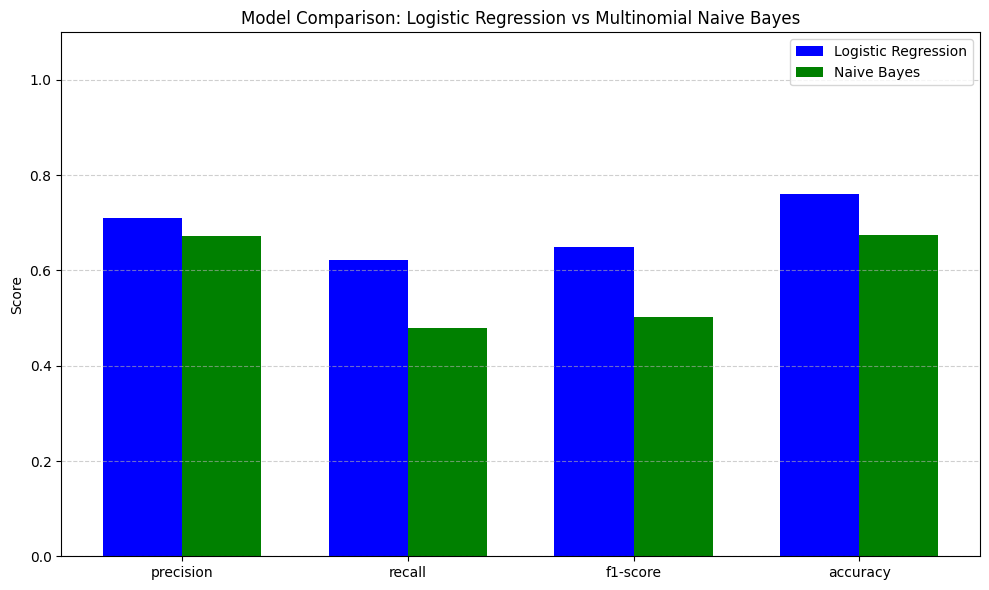

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score

# 1. Evaluate both models and get reports
lr_report = classification_report(y_test, y_pred, output_dict=True)
nb_report = classification_report(y_test, nb_pred, output_dict=True)

# 2. Get macro avg metrics
metrics = ['precision', 'recall', 'f1-score']
lr_scores = [lr_report['macro avg'][m] for m in metrics]
nb_scores = [nb_report['macro avg'][m] for m in metrics]

# Add accuracy separately
lr_accuracy = accuracy_score(y_test, y_pred)
nb_accuracy = accuracy_score(y_test, nb_pred)

# 3. Plot the comparison
x_labels = metrics + ['accuracy']
lr_values = lr_scores + [lr_accuracy]
nb_values = nb_scores + [nb_accuracy]

x = range(len(x_labels))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar([p - width/2 for p in x], lr_values, width, label='Logistic Regression', color='blue')
plt.bar([p + width/2 for p in x], nb_values, width, label='Naive Bayes', color='green')
plt.xticks(x, x_labels)
plt.ylabel('Score')
plt.title('Model Comparison: Logistic Regression vs Multinomial Naive Bayes')
plt.legend()
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [39]:
# Check number of duplicate rows (all columns)
duplicate_rows = df_clean.duplicated()
print("Total duplicate rows:", duplicate_rows.sum())

# View duplicate rows
df_clean[duplicate_rows].head()


Total duplicate rows: 183


,over_18,subreddit,clean_text,created_datetime
6795,0,0,urgent guess uhm kinda need someone assess sev...,2022-01-24 07:19:15
7195,0,0,everything feel pointless removed,2022-02-15 19:43:02
32938,0,0,toxicity loneliness removed,2022-01-09 18:19:15
55359,0,0,stichess fix tw blood self harm today really s...,2021-06-29 22:06:47
56210,0,0,people find thing annoying never realise annoy...,2021-02-02 21:44:20


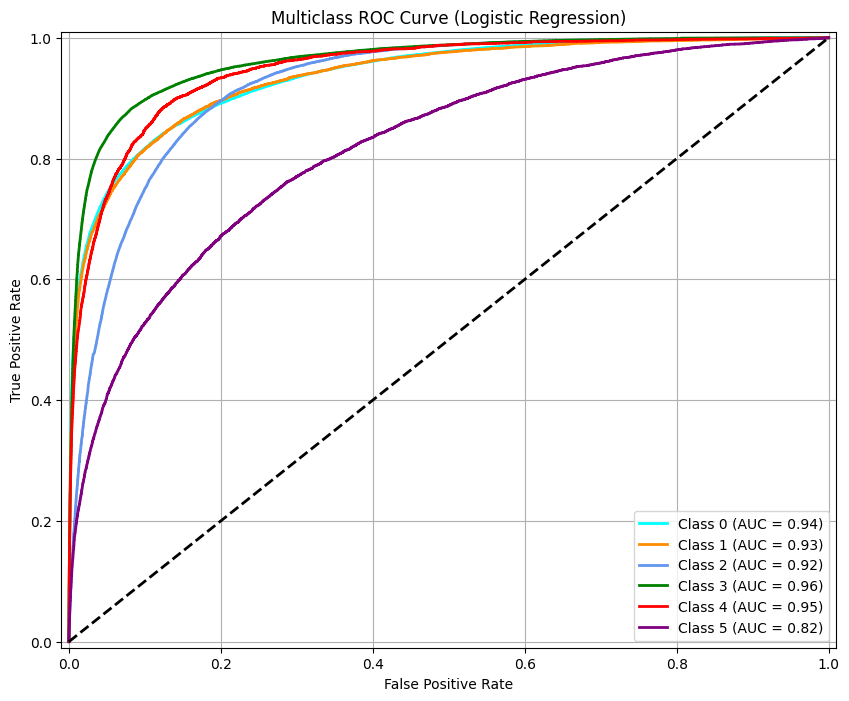

In [56]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 1. Recreate TF-IDF and labels
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df_clean['clean_text'])
y = df_clean['subreddit']

# 2. Binarize y (required for multiclass ROC)
classes = sorted(y.unique())  # e.g., [0,1,2,3,4,5]
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]

# 3. Train-test split
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X_tfidf, y_bin, test_size=0.2, random_state=42)

# 4. Train One-vs-Rest classifier
clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
clf.fit(X_train, y_train_bin)
y_score = clf.decision_function(X_test)  # needed for ROC

# 5. Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 6. Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [59]:
import joblib

# 1. Load the saved model and vectorizer
model = joblib.load("/content/drive/MyDrive/MACHINE LEARNING/logistic_model.pkl")
vectorizer = joblib.load("/content/drive/MyDrive/MACHINE LEARNING/tfidf_vectorizer.pkl")

# 2. Define class label mapping
label_map = {
    0: 'BPD',
    1: 'bipolar',
    2: 'depression',
    3: 'Anxiety',
    4: 'schizophrenia',
    5: 'mentalillness'
}

# 3. Define prediction function
def predict_subreddit(user_input):
    input_vector = vectorizer.transform([user_input])
    prediction = model.predict(input_vector)
    return label_map[prediction[0]]  # Convert numeric label to class name

# 4. Get user input and predict
text = input("📝 Enter mental health post text: ")
predicted_label = predict_subreddit(text)

print(f"\n🔮 Predicted Subreddit Category: {predicted_label}")


📝 Enter mental health post text: hello jee

🔮 Predicted Subreddit Category: depression
